In [1]:
import numpy as np
import warnings
from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import get_file
from keras import backend as K


2023-10-27 20:34:26.920687: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 20:34:26.920722: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 20:34:26.921259: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 20:34:27.005015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 20:34:28.017299: W tensorflow/compiler/

In [2]:
img_input = Input(shape=(28,28,1))
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(192, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
x = MaxPooling2D((1, 1), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

#fc layers
x = Flatten(name='flatten')(x)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dense(1024, activation='relu', name='fc2')(x)
x = Dense(5, activation='softmax', name='predictions')(x)

model = Model(img_input, x, name='vgg19')

2023-10-27 20:34:29.286190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-27 20:34:29.387953: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-27 20:34:29.388200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 28, 28, 32)        320       
                                                                 
 block1_conv2 (Conv2D)       (None, 28, 28, 32)        9248      
                                                                 
 block1_pool (MaxPooling2D)  (None, 14, 14, 32)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 14, 14, 64)        18496     
                                                                 
 block2_conv2 (Conv2D)       (None, 14, 14, 64)        36928     
                                                                 
 block2_pool (MaxPooling2D)  (None, 7, 7, 64)          0     

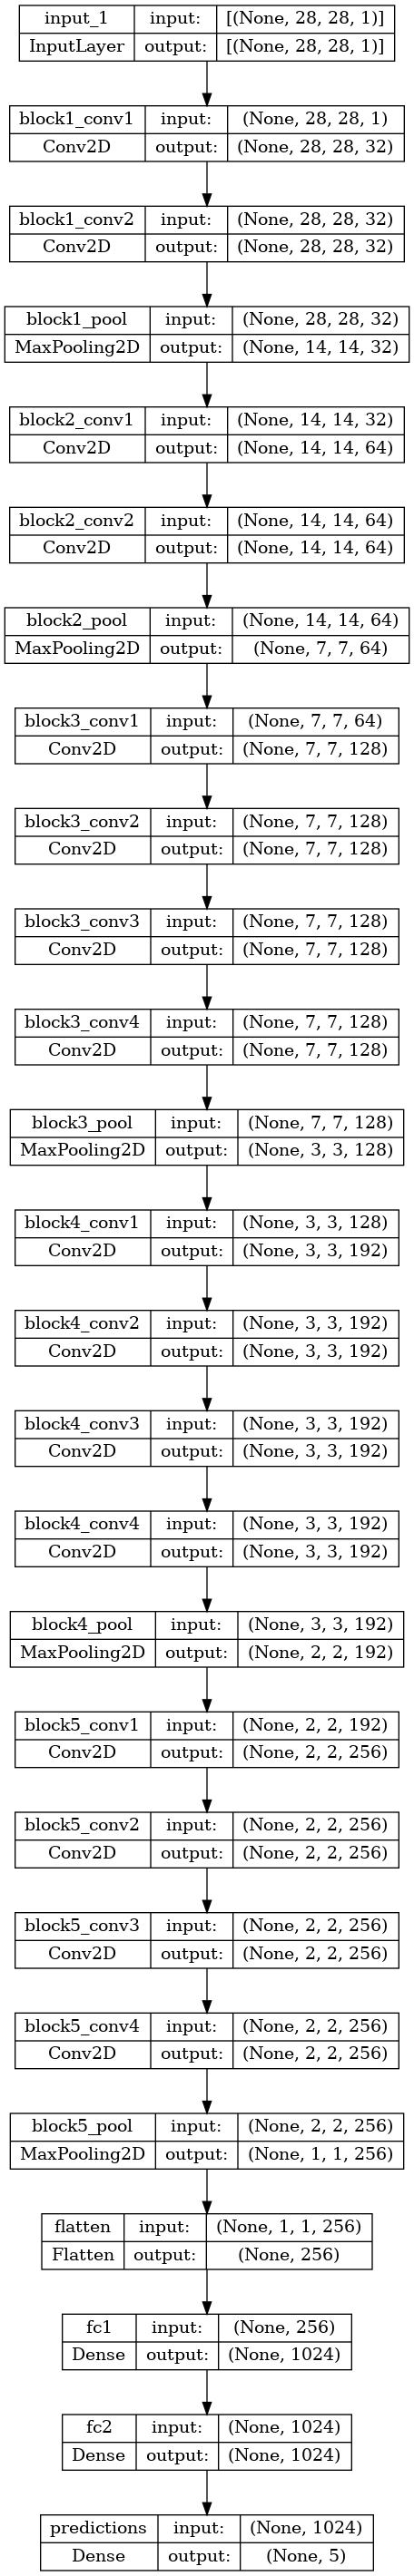

In [4]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file = 'vgg19_arch.png')

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range = 10)
train_images = train_datagen.flow_from_directory('/home/mrroy/Dataset/CLASS/train/',  color_mode = 'grayscale', target_size = (28, 28), batch_size = 32)
val_datagen = ImageDataGenerator(rescale=1.0/255)
validation_images = val_datagen.flow_from_directory('/home/mrroy/Dataset/CLASS/validation/',  color_mode = 'grayscale', target_size = (28, 28), batch_size = 32)

Found 24573 images belonging to 5 classes.
Found 3516 images belonging to 5 classes.


In [7]:
import tensorflow as tf

# Enable device placement logging
tf.debugging.set_log_device_placement(True)



In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
STEP_SIZE_TRAIN = train_images.n//train_images.batch_size
STEP_SIZE_VALID = validation_images.n//validation_images.batch_size
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

filepath='vgg19_models/vgg_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, mode='max', verbose=1)

# Create a list of callbacks, including ModelCheckpoint and EarlyStopping
callbacks_list = [checkpoint, early_stopping]

# Start training
history = model.fit_generator(generator=train_images,
                               steps_per_epoch=STEP_SIZE_TRAIN,
                               validation_data=validation_images,
                               validation_steps=STEP_SIZE_VALID,
                               callbacks=callbacks_list,
                               epochs=100)


/tmp/ipykernel_3173/3206307129.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_images,


Epoch 1/100


2023-10-27 20:34:32.814123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-27 20:34:33.623709: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3594041db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 20:34:33.623733: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2023-10-27 20:34:33.631288: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-27 20:34:33.759718: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


767/767 [==============================] - ETA: 0s - loss: 0.9050 - accuracy: 0.7341
Epoch 1: val_accuracy improved from -inf to 0.73423, saving model to vgg19_models/vgg_model.h5


/home/mrroy/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


767/767 [==============================] - 178s 224ms/step - loss: 0.9050 - accuracy: 0.7341 - val_loss: 0.8718 - val_accuracy: 0.7342
Epoch 2/100
767/767 [==============================] - ETA: 0s - loss: 0.8707 - accuracy: 0.7349
Epoch 2: val_accuracy did not improve from 0.73423
767/767 [==============================] - 176s 229ms/step - loss: 0.8707 - accuracy: 0.7349 - val_loss: 0.8714 - val_accuracy: 0.7342
Epoch 3/100
767/767 [==============================] - ETA: 0s - loss: 0.8711 - accuracy: 0.7348
Epoch 3: val_accuracy did not improve from 0.73423
767/767 [==============================] - 186s 243ms/step - loss: 0.8711 - accuracy: 0.7348 - val_loss: 0.8726 - val_accuracy: 0.7339
Epoch 4/100
767/767 [==============================] - ETA: 0s - loss: 0.8706 - accuracy: 0.7351
Epoch 4: val_accuracy did not improve from 0.73423
767/767 [==============================] - 182s 237ms/step - loss: 0.8706 - accuracy: 0.7351 - val_loss: 0.8733 - val_accuracy: 0.7334
Epoch 5/100
767/

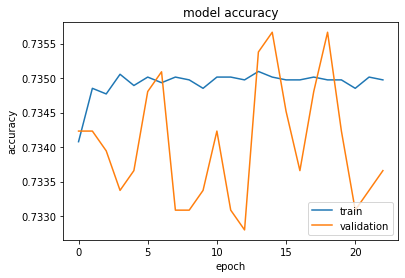

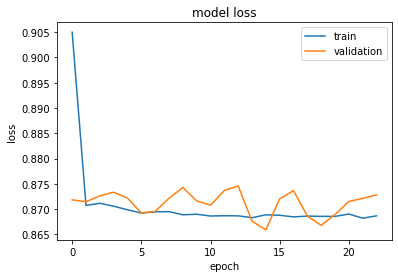

In [9]:
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    
    plt.show()

In [10]:
from keras.models import load_model
m = load_model('vgg19_models/vgg_model.h5')

In [11]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_images = test_datagen.flow_from_directory('/home/mrroy/Dataset/CLASS/test/',  color_mode = 'grayscale', target_size = (28, 28), batch_size = 32)
p = m.evaluate_generator(test_images, verbose=1, steps=test_images.n//test_images.batch_size)
print(p)

Found 7019 images belonging to 5 classes.


/tmp/ipykernel_3173/2302545426.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  p = m.evaluate_generator(test_images, verbose=1, steps=test_images.n//test_images.batch_size)


219/219 [==============================] - 42s 190ms/step - loss: 0.8667 - accuracy: 0.7352
[0.8666909337043762, 0.7351598143577576]


In [12]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_images = test_datagen.flow_from_directory('/home/mrroy/Dataset/CLASS/test/',  color_mode = 'grayscale', target_size = (28, 28), batch_size = 32, shuffle = False)

Found 7019 images belonging to 5 classes.


In [13]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, accuracy_score, f1_score, recall_score

In [14]:
y_pred = m.predict(test_images).argmax(axis=-1)

220/220 [==============================] - 39s 179ms/step


In [15]:
print(classification_report(test_images.classes[test_images.index_array], y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      5160
           1       0.00      0.00      0.00       487
           2       0.00      0.00      0.00      1057
           3       0.00      0.00      0.00       174
           4       0.00      0.00      0.00       141

    accuracy                           0.74      7019
   macro avg       0.15      0.20      0.17      7019
weighted avg       0.54      0.74      0.62      7019



/home/mrroy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mrroy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mrroy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print('precision')
p1 = precision_score(test_images.classes[test_images.index_array], y_pred, average = 'weighted')
print(p1*100)
print('recall')
r1 = recall_score(test_images.classes[test_images.index_array], y_pred, average = 'weighted')
print(r1*100)
print('f1')
f11 = f1_score(test_images.classes[test_images.index_array], y_pred, average = 'weighted')
print(f11*100)
print('accuracy')
a1 = accuracy_score(test_images.classes[test_images.index_array], y_pred)
print(a1*100)

precision
54.044178339049644
recall
73.51474569026927
f1
62.29347036075039
accuracy
73.51474569026927


/home/mrroy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
